## Assignment 5 - K-Means Type Clustering Algorithms

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

np.random.seed(123)

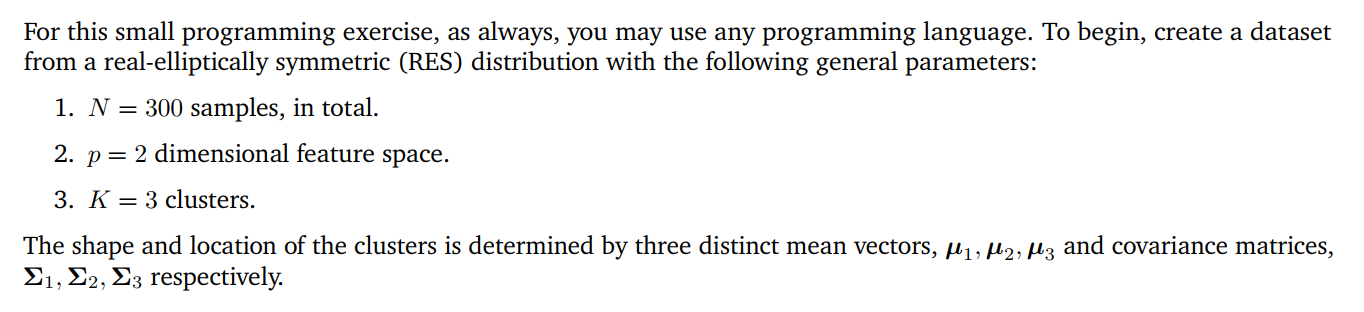

In [4]:
def generate_samples_res(n, sigma, u):
    """
    Generate n p-dimensional vectors with covariance matrix sigma and mean u.

    Parameters:
    n (int): Number of vectors to generate.
    p (int): Dimensionality of each vector.
    sigma (numpy.ndarray): Covariance matrix (p x p).
    u (numpy.ndarray): Mean vector (p,).

    Returns:
    numpy.ndarray: Generated vectors (n x p).
    """
    return np.random.multivariate_normal(u, sigma, n)

def generate_random_probabilities_for_clusters(num_clusters: int):
    """
    Generate three random probabilities that sum up to one.

    Returns:
    tuple: Three probabilities that sum up to one.
    """
    probs = np.random.dirichlet(np.ones(num_clusters), size=1)[0]
    return probs

def make_spd_matrix(n):
    """Generate a random n x n symmetric positive semi-definite matrix."""
    A = np.random.rand(n, n)
    return np.dot(A, A.T)

def create_covariance_matrix(eigenvec1: np.ndarray, eigenvec2: np.ndarray, eigenval1: float, eigenval2: float):
    """
    Create a covariance matrix from the given eigenvalues and eigenvectors.

    Parameters:
    eigenvec1 (numpy.ndarray): Eigenvector 1 (p,).
    eigenvec2 (numpy.ndarray): Eigenvector 2 (p,).
    eigenval1 (float): Eigenvalue 1.
    eigenval2 (float): Eigenvalue 2.

    Returns:
    numpy.ndarray: Covariance matrix (p x p).
    """
    
    eigenvec1 = eigenvec1 / np.linalg.norm(eigenvec1)
    eigenvec2 = eigenvec2 / np.linalg.norm(eigenvec2)
    
    return eigenval1 * np.outer(eigenvec1, eigenvec1) + eigenval2 * np.outer(eigenvec2, eigenvec2)

def plot_dataset_with_cluster_assignments(samples_df, cluster_means, title = None):
    total_num_samples = len(samples_df)
    sns.scatterplot(data=samples_df, x='x', y='y', hue='cluster', hue_order=["A", "B", "C"])
    plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=100, marker='x', label='Cluster mean')
    if title:
        plt.title(title)
    else:
        plt.title(f"Original dataset with 3 clusters - {total_num_samples} samples")
    plt.legend(title='Cluster')
    plt.show()

### Task 1a

In [5]:

TOTAL_NUM_SAMPLES = 300

probs = generate_random_probabilities_for_clusters(3)
print("Probabilities of each cluster: ", probs)

n_samples_cluster_a = int(round(TOTAL_NUM_SAMPLES * probs[0]))
n_samples_cluster_b = int(round(TOTAL_NUM_SAMPLES * probs[1]))
n_samples_cluster_c = TOTAL_NUM_SAMPLES - n_samples_cluster_a - n_samples_cluster_b


mu_a = np.array([0, 0])
sigma_a = np.array([[1, 0], [0, 1]])

eigvec1 = np.array([1, 1])
eigvec2 = np.array([-1, 1])
eigval1 = 0.5
eigval2 = 0.6
mu_b = np.array([4, 4])
sigma_b = create_covariance_matrix(eigvec1, eigvec2, eigval1, eigval2)

mu_c = np.array([-2, 3])
eigvec1 = np.array([2, 1])
eigvec2 = np.array([-1, 2])
eigval1 = 0.3
eigval2 = 0.2
sigma_c = create_covariance_matrix(eigvec1, eigvec2, eigval1, eigval2)

print("Number of samples in cluster A: ", n_samples_cluster_a)
print("Number of samples in cluster B: ", n_samples_cluster_b)
print("Number of samples in cluster C: ", n_samples_cluster_c)

print("Mean of cluster A: ", mu_a)
print("Covariance matrix of cluster A: \n", sigma_a)
print("Mean of cluster B: ", mu_b)
print("Covariance matrix of cluster B: \n", sigma_b)
print("Mean of cluster C: ", mu_c)
print("Covariance matrix of cluster C: \n", sigma_c)

Probabilities of each cluster:  [0.66733254 0.18866171 0.14400575]
Number of samples in cluster A:  200
Number of samples in cluster B:  57
Number of samples in cluster C:  43
Mean of cluster A:  [0 0]
Covariance matrix of cluster A: 
 [[1 0]
 [0 1]]
Mean of cluster B:  [4 4]
Covariance matrix of cluster B: 
 [[ 0.55 -0.05]
 [-0.05  0.55]]
Mean of cluster C:  [-2  3]
Covariance matrix of cluster C: 
 [[0.28 0.04]
 [0.04 0.22]]


In [6]:
samples_cluster_a = generate_samples_res(n_samples_cluster_a, sigma_a, mu_a)
samples_cluster_b = generate_samples_res(n_samples_cluster_b, sigma_b, mu_b)
samples_cluster_c = generate_samples_res(n_samples_cluster_c, sigma_c, mu_c)

samples = np.concatenate((samples_cluster_a, samples_cluster_b, samples_cluster_c), axis=0)

samples_df = pd.DataFrame(samples, columns=['x', 'y'])
samples_df["cluster"] = "A"
samples_df.loc[samples_df.index >= n_samples_cluster_a, "cluster"] = "B"
samples_df.loc[samples_df.index >= n_samples_cluster_a + n_samples_cluster_b, "cluster"] = "C"

samples_df

,x,y,cluster
0,1.738370,0.406454,A
1,0.322106,-0.051518,A
2,-0.204201,1.979348,A
3,-1.619300,-1.113964,A
4,-0.447441,1.668402,A
...,...,...,...
295,-2.252955,3.119901,C
296,-1.512033,2.849657,C
297,-2.793831,2.672505,C
298,-2.492639,3.952533,C


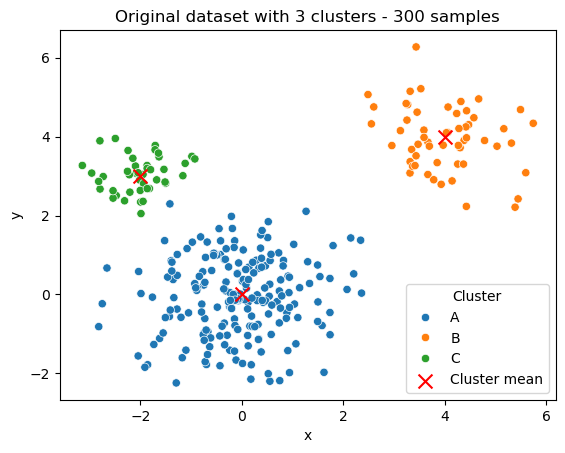

In [7]:
plot_dataset_with_cluster_assignments(samples_df, np.array([mu_a, mu_b, mu_c]))

In [8]:
kmeans_model = KMeans(n_clusters=3, random_state=123)
kmeans_model.fit(samples)
cluster_means = kmeans_model.cluster_centers_

print("Cluster centers: \n", cluster_means)

Cluster centers: 
 [[ 4.01980539  3.9557384 ]
 [-0.04864047 -0.09742842]
 [-1.97460058  2.91253543]]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
kmeans_original_labels = kmeans_model.labels_
print("Original cluster labels: ")
kmeans_original_labels

Original cluster labels: 


array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Remapped labels: ['A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' '

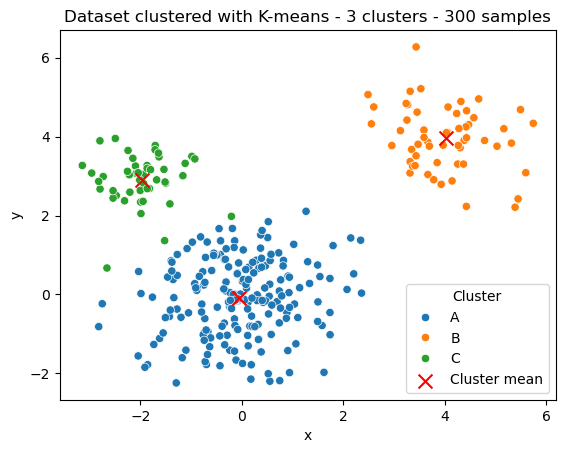

In [10]:
# Define custom mapping: cluster 0 → B, cluster 1 → A, cluster 2 → C
custom_mapping = {0: "B", 1: "A", 2: "C"}

# Apply the mapping
remapped_labels = np.vectorize(custom_mapping.get)(kmeans_original_labels)
print("Remapped labels:", remapped_labels)

clustered_dataset_df = pd.DataFrame(samples, columns=['x', 'y'])
clustered_dataset_df["cluster"] = remapped_labels

title = f"Dataset clustered with K-means - 3 clusters - {TOTAL_NUM_SAMPLES} samples"

plot_dataset_with_cluster_assignments(clustered_dataset_df, cluster_means, title)

In [ ]:
y_pred = clustered_dataset_df["cluster"]
y_true = samples_df["cluster"]

accuracy = sum(y_pred == y_true) / len(y_true)
print("Accuracy: ", accuracy)

Accuracy:  0.9866666666666667


## Task 1b

In [ ]:
print("Probabilities of each cluster: ", probs)

mu_a = np.array([0, 0])
sigma_a = np.array([[1.5, 0], [0, 1.5]])

mu_b = np.array([2, 2])
eigvec1 = np.array([1, 1])
eigvec2 = np.array([-1, 1])
eigval1 = 0.1
eigval2 = 0.6
sigma_b = create_covariance_matrix(eigvec1, eigvec2, eigval1, eigval2)

mu_c = np.array([-2, 2])
eigvec1 = np.array([2, 1])
eigvec2 = np.array([-1, 2])
eigval1 = 0.7
eigval2 = 0.1
sigma_c = create_covariance_matrix(eigvec1, eigvec2, eigval1, eigval2)


print("Number of samples in cluster A: ", n_samples_cluster_a)
print("Number of samples in cluster B: ", n_samples_cluster_b)
print("Number of samples in cluster C: ", n_samples_cluster_c)

print("Mean of cluster A: ", mu_a)
print("Covariance matrix of cluster A: \n", sigma_a)
print("Mean of cluster B: ", mu_b)
print("Covariance matrix of cluster B: \n", sigma_b)
print("Mean of cluster C: ", mu_c)
print("Covariance matrix of cluster C: \n", sigma_c)

Probabilities of each cluster:  [0.66733254 0.18866171 0.14400575]
Number of samples in cluster A:  200
Number of samples in cluster B:  57
Number of samples in cluster C:  43
Mean of cluster A:  [0 0]
Covariance matrix of cluster A: 
 [[1.5 0. ]
 [0.  1.5]]
Mean of cluster B:  [2 2]
Covariance matrix of cluster B: 
 [[ 0.7 -0.5]
 [-0.5  0.7]]
Mean of cluster C:  [-2  2]
Covariance matrix of cluster C: 
 [[2.9 1.2]
 [1.2 1.1]]


In [ ]:
samples_cluster_a = generate_samples_res(n_samples_cluster_a, sigma_a, mu_a)
samples_cluster_b = generate_samples_res(n_samples_cluster_b, sigma_b, mu_b)
samples_cluster_c = generate_samples_res(n_samples_cluster_c, sigma_c, mu_c)

samples = np.concatenate((samples_cluster_a, samples_cluster_b, samples_cluster_c), axis=0)

samples_df = pd.DataFrame(samples, columns=['x', 'y'])
samples_df["cluster"] = "A"
samples_df.loc[samples_df.index >= n_samples_cluster_a, "cluster"] = "B"
samples_df.loc[samples_df.index >= n_samples_cluster_a + n_samples_cluster_b, "cluster"] = "C"

samples_df

,x,y,cluster
0,-0.198863,0.071892,A
1,1.264773,-0.038831,A
2,0.680031,1.004315,A
3,0.509952,0.738446,A
4,-0.027411,-0.458933,A
...,...,...,...
295,-1.849009,3.253202,C
296,-2.444478,2.571794,C
297,-0.437519,2.896540,C
298,-1.875639,2.749748,C


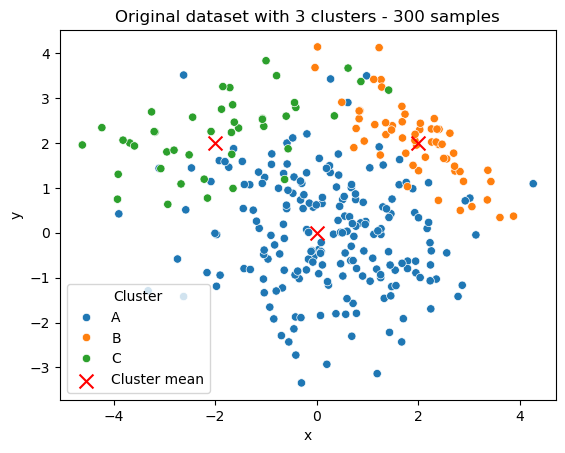

In [ ]:
plot_dataset_with_cluster_assignments(samples_df, np.array([mu_a, mu_b, mu_c]))

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=123)
kmeans_model.fit(samples)
cluster_means = kmeans_model.cluster_centers_

print("Cluster centers: \n", cluster_means)

Cluster centers: 
 [[ 1.67236803  1.74982113]
 [ 0.46609784 -0.77508175]
 [-1.76361575  1.50691221]]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
kmeans_original_labels = kmeans_model.labels_
kmeans_original_labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2,
       1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Remapped labels: ['A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'C' 'A' 'C'
 'B' 'A' 'C' 'C' 'C' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'B' 'A' 'A' 'A' 'A'
 'B' 'C' 'C' 'A' 'B' 'C' 'C' 'C' 'A' 'B' 'A' 'A' 'C' 'A' 'A' 'B' 'A' 'A'
 'A' 'C' 'C' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'C' 'B' 'A' 'A' 'B' 'C' 'A'
 'A' 'C' 'A' 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'C' 'A' 'A' 'C' 'A' 'C' 'A'
 'B' 'A' 'A' 'A' 'A' 'C' 'B' 'A' 'A' 'B' 'C' 'B' 'A' 'B' 'B' 'B' 'B' 'C'
 'A' 'B' 'B' 'C' 'C' 'A' 'B' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'C' 'A'
 'A' 'A' 'C' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'C' 'A' 'A' 'A' 'B'
 'A' 'A' 'A' 'B' 'C' 'B' 'A' 'B' 'C' 'C' 'B' 'A' 'B' 'C' 'C' 'C' 'C' 'A'
 'B' 'B' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'C' 'C' 'C' 'A' 'A' 'B' 'A' 'A' 'A'
 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' '

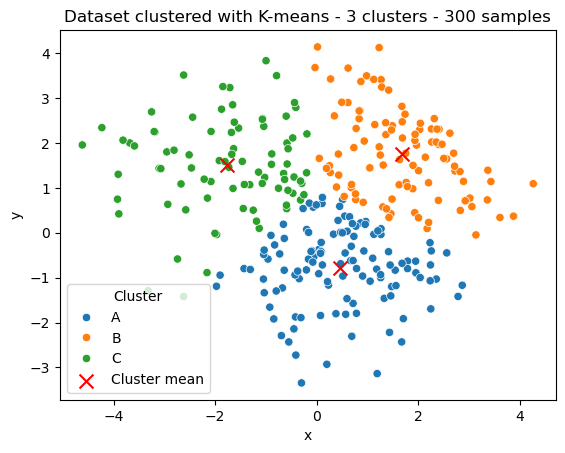

In [ ]:
# Define custom mapping: cluster 0 → B, cluster 1 → A, cluster 2 → C
custom_mapping = {0: "B", 1: "A", 2: "C"}

# Apply the mapping
remapped_labels = np.vectorize(custom_mapping.get)(kmeans_original_labels)
print("Remapped labels:", remapped_labels)

clustered_dataset_df = pd.DataFrame(samples, columns=['x', 'y'])
clustered_dataset_df["cluster"] = remapped_labels

title = f"Dataset clustered with K-means - 3 clusters - {TOTAL_NUM_SAMPLES} samples"

plot_dataset_with_cluster_assignments(clustered_dataset_df, cluster_means, title)

In [ ]:
y_pred = clustered_dataset_df["cluster"]
y_true = samples_df["cluster"]

accuracy = sum(y_pred == y_true) / len(y_true)
print("Accuracy: ", accuracy)

Accuracy:  0.7166666666666667
